Dùng Keras cho mô hình đơn giản

In [56]:
from keras.models import Sequential
from keras.layers import Dense

In [66]:
# Build the model.
model = Sequential([
  Dense(25, activation='relu', input_shape=(3,)),
  Dense(25, activation='relu'),
  Dense(1, activation='sigmoid'),
])

In [84]:
model = Sequential()
model.add(Dense(25, activation='relu',input_shape=(3,)))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [85]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 25)                100       
_________________________________________________________________
dense_33 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 26        
Total params: 776
Trainable params: 776
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [62]:
import numpy as np
X=np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]]) 
y=np.array([[0,1,1,0]]).T

In [75]:
H =model.fit(
  X,y,
  epochs=10,
  batch_size=4,
)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 1.9970e-04 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 1.9918e-04 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 1.9867e-04 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 1.9817e-04 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 1.9768e-04 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 1.9718e-04 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 1.9668e-04 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 1.9617e-04 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 1.9568e-04 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 1.9519e-04 - accuracy: 1.0000

In [76]:
model.predict(X)

array([[2.3409724e-04],
       [9.9984074e-01],
       [9.9970502e-01],
       [9.0417961e-05]], dtype=float32)

In [77]:
model.evaluate(X,y)

1/1 [==============================] - 0s 4ms/step - loss: 1.9470e-04 - accuracy: 1.0000


[0.00019469845574349165, 1.0]

Lấy dữ liệu từ mnist. Có 2 tập train và test


In [78]:
print(H.history)

{'loss': [0.00019969677668996155, 0.00019918465113732964, 0.0001986704155569896, 0.00019817380234599113, 0.00019768031779676676, 0.00019718098337762058, 0.00019667678861878812, 0.00019617154612205923, 0.00019568309653550386, 0.0001951916638063267], 'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


Có 60000 ảnh train và 10000 ảnh để test

Mạng có 1 lớp vào 784 nút, 2 lớp ẩn mỗi lớp 64 nút, 1 lớp ra 10 nút. Các hàm kích hoạt là relu và softmax

Huấn luyện mạng 

In [43]:
print(H.history.keys())

dict_keys(['loss', 'accuracy'])


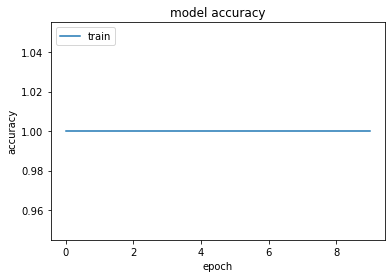

In [79]:
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

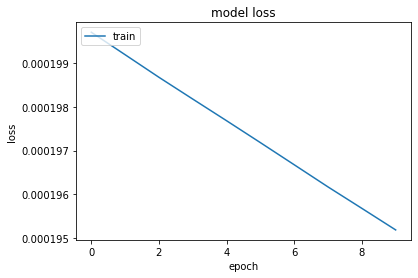

In [80]:
# summarize history for loss
plt.plot(H.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
model.save_weights('model.h5')

In [35]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:20])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:20]) # [7, 2, 1, 0, 4]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Thử lấy model đã lưu trong model.h5 - không phải đào tạo lại

In [14]:
from keras.models import Sequential
from keras.layers import Dense

# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Load the model's saved weights.
model.load_weights('model.h5')

In [15]:
#@tf.autograph.experimental.do_not_convert
# Predict on the first 5 test images.
predictions = model.predict(test_images[:50])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:50]) # [7, 2, 1, 0, 4]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
